## Complete Naive Process which gives us 92% accuracy

### This Model consists of 1 Layer with 10 softmax neurons as output as there are 10 numbers
+ Each nuron does the weighted sum of its inputs + Bias
+ 9 neurons as there are 9 values
+ After doing the whole process, we normalize and that is done using the softmax function
+ Use the Softmax function as that is the best function
+ 28x28 pixel image = 784 pixels
+ Instead of One one we do the weighted sum of all the 100 images 
+ weights are the degree of freedom
+ Adding the biases are tough, but we can do it using numpy addition
+ Line by line calculation of the prediction output using softmax function, at the end we get 10 values, ie, output of each neuron, so out output should be a matrix of size [100,10]
+ This will only work if weights and biased are good
+ Supervised learning, we have a batch of handwritten digits which are alredy labelled, we have a system which predicts, we would need to define a metric to characterize the system
+ Cross entropy is a good measure to calculate the error, others can be euclidean disctance, cosine distance , RMS error etc..

+ Now that we have the distance we have to minimze it, and this is out goal, find the weights and biases that minimized the distance
+ Learning rate is the small steps to take to go in the right direction to reach the bottom or the point of least distance

In [24]:
import sys
import tensorflow as tf
import tensorflowvisu
import math

In [25]:


print("TensorFlow version " + tf.__version__)
tf.set_random_seed(0)

TensorFlow version 1.8.0


In [41]:
from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

X=tf.placeholder(tf.float32, [None, 784]) #gray scale so 1 value for pixel
W=tf.Variable(tf.zeros([784, 10]))
b=tf.Variable(tf.zeros([10]))

#model
Y=tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

#placeholder for known labels
Y_=tf.placeholder(tf.float32, [None, 10]) #one hot encoded

#loss function
cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))

#correct answers
is_correct=tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))

optimizer=tf.train.GradientDescentOptimizer(0.003)
train_step=optimizer.minimize(cross_entropy)

# Matplotlib visualization
allweights=tf.reshape(W, [-1])
allbiases=tf.reshape(W,[-1])
#I=tensorflowvisu.tf_format_mnist_images(X, Y, Y_) #assembles all 10x10 images by default
#It=tensorflowvisu.tf_format_mnist_images(X,Y,Y_,1000, lines=25) #1000 images on 25 lines
#datavis=tensorflowvisu.MnistDataVis()

# Run TF session
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

train_accuracy_=[]
train_loss=[]
test_accuracy_=[]
test_loss=[]

#Train the model 100 images at a time by the function below
def training_Step(i, update_test_data, update_train_data):
        batch_X, batch_Y = mnist.train.next_batch(100)
        
        # Backpropagation training step
        train_data = {X:batch_X, Y_:batch_Y}
        sess.run(train_step, feed_dict=train_data)
        
        #Compute training values for visualization
        if update_train_data:
            a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
            #a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict=train_data)
            #datavis.append_training_curves_data(i, a, c)
            #datavis.append_data_histograms(i, w, b)
            #datavis.update_image1(im)
            if i%100==0:
                train_accuracy_.append(a*100.0)
                train_loss.append(c)
                print("Iterationg: {}, Train Acuuracy: {}, Train Loss: {}".format(i, a*100, c))
        
        #On the test data values for visualization
        if update_test_data:
            test_data={X:mnist.test.images, Y_:mnist.test.labels}
            a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
            #a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict=test_data)
            #datavis.append_test_curves_data(i, a, c)
            #datavis.update_image1(im)
            if i%100==0:
                test_accuracy_.append(a*100.0)
                test_loss.append(c)
                print("Iterationg: {}, Test Acuuracy: {}, Test Loss: {}".format(i, a*100, c))
        
        
for i in range(10000+1): training_Step(i,True, True)
#datavis.animate(training_Step, iterations=2000+1, train_data_update_freq=10, test_data_update_freq=50, more_tests_at_start=True)
#print("maximum test set accuracy = {}".format(datavis.get_max_test_accuracy()))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iterationg: 0, Train Acuuracy: 41.999998688697815, Train Loss: 179.85971069335938
Iterationg: 0, Test Acuuracy: 24.719999730587006, Test Loss: 21109.01171875
Iterationg: 100, Train Acuuracy: 93.00000071525574, Train Loss: 35.6300048828125
Iterationg: 100, Test Acuuracy: 88.77000212669373, Test Loss: 4286.244140625
Iterationg: 200, Train Acuuracy: 91.00000262260437, Train Loss: 32.217979431152344
Iterationg: 200, Test Acuuracy: 90.31000137329102, Test Loss: 3656.164306640625
Iterationg: 300, Train Acuuracy: 92.00000166893005, Train Loss: 29.642107009887695
Iterationg: 300, Test Acuuracy: 90.64000248908997, Test Loss: 3444.08154296875
Iterationg: 400, Train Acuuracy: 92.00000166893005, Train Loss: 28.502086639404297
Iterationg: 400, Test Acuuracy: 91.11999869346619, Test Loss: 3266.0283203125
Iter

Iterationg: 5000, Train Acuuracy: 94.9999988079071, Train Loss: 16.742599487304688
Iterationg: 5000, Test Acuuracy: 92.1500027179718, Test Loss: 2775.94287109375
Iterationg: 5100, Train Acuuracy: 94.9999988079071, Train Loss: 14.352218627929688
Iterationg: 5100, Test Acuuracy: 92.36000180244446, Test Loss: 2698.89208984375
Iterationg: 5200, Train Acuuracy: 93.99999976158142, Train Loss: 17.056583404541016
Iterationg: 5200, Test Acuuracy: 92.15999841690063, Test Loss: 2737.9833984375
Iterationg: 5300, Train Acuuracy: 95.99999785423279, Train Loss: 14.751758575439453
Iterationg: 5300, Test Acuuracy: 92.47000217437744, Test Loss: 2693.533203125
Iterationg: 5400, Train Acuuracy: 93.00000071525574, Train Loss: 25.38640594482422
Iterationg: 5400, Test Acuuracy: 92.41999983787537, Test Loss: 2733.49658203125
Iterationg: 5500, Train Acuuracy: 98.00000190734863, Train Loss: 14.480518341064453
Iterationg: 5500, Test Acuuracy: 92.21000075340271, Test Loss: 2715.59716796875
Iterationg: 5600, Train

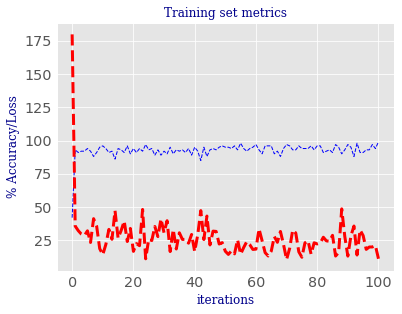

In [45]:
#plotting using Matplotlib
import matplotlib.pyplot as plt

font={
    'family':'serif',
    'color' :'darkblue',
    'weight':'normal',
    'size':12,
}

x_vals=[i for i in range(0, 10000, 100)]

plt.figure(1)
plt.title('Training set metrics', fontdict=font)
plt.xlabel('iterations',fontdict=font)
plt.ylabel('% Accuracy / Loss',fontdict=font)
plt.plot(train_accuracy_, 'b--', train_loss, 'r--')
plt.show()

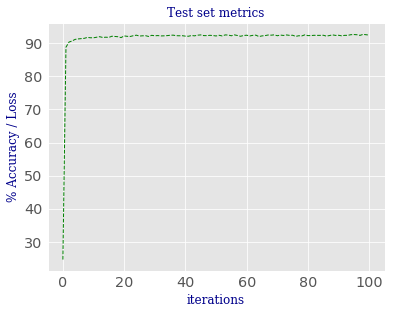

In [48]:
plt.figure(2)
plt.title('Test set metrics', fontdict=font)
plt.xlabel('iterations',fontdict=font)
plt.ylabel('% Accuracy / Loss',fontdict=font)
plt.plot(test_accuracy_, 'g--')
plt.show()

### The Final Accuracy got here could be stretched to 92%